In [ ]:
import pandas as pd
import geopandas as gpd
import os
from geopy import distance
import calendar

os.chdir("/Users/anorawu/Documents/GitHub/CloudSeeding/data/炮台数据")

In [ ]:
fort_data = pd.read_csv("cleaned_炮台数据.csv")
fort_data = fort_data[fort_data['year']<=2022]

lon_max = fort_data['longitude'].max() + 1
lon_min = fort_data['longitude'].min() - 1
lat_max = fort_data['latitude'].max() + 1
lat_min = fort_data['latitude'].min() - 1

In [ ]:
fort_points = fort_data[['index','longitude','latitude']].drop_duplicates()

In [ ]:
rain_data = pd.read_stata("weatherstation_2010_2022.dta")
rain_data = rain_data.dropna(subset=['Lat', 'Lon'])
rain_data = rain_data[(rain_data['Lat'] >= lat_min) & (rain_data['Lat'] <= lat_max)]
rain_data = rain_data[(rain_data['Lon'] >= lon_min) & (rain_data['Lon'] <= lon_max)]

rain_points = rain_data[['StationId','Lon','Lat']].drop_duplicates()

In [ ]:
rain_gdf = gpd.GeoDataFrame(
    rain_points,
    geometry=gpd.points_from_xy(rain_points['Lon'], rain_points['Lat']),
    crs="EPSG:4326" 
)

In [ ]:
fort_gdf = gpd.GeoDataFrame(
    fort_points,
    geometry=gpd.points_from_xy(fort_points['longitude'], fort_points['latitude']),
    crs="EPSG:4326" 
)

In [ ]:
radius = 0.5
dic = {}

for _, fort_point in fort_gdf.iterrows():  
    buffer = fort_point.geometry.buffer(radius)  
    
    pts_inside = rain_gdf[rain_gdf.within(buffer)]
    
    pts_dic = {}
    for _, row in pts_inside.iterrows():
        dist = distance.distance(
            (fort_point.geometry.y, fort_point.geometry.x),  
            (row['Lat'], row['Lon'])                        
        ).km
        pts_dic[row['StationId']] = dist
    
    sorted_pts = sorted(pts_dic.items(), key=lambda item: item[1])[:2]
    
    dic[fort_point['index']] = sorted_pts  



In [ ]:
columns = ['Alti', 'EVP', 'GST_Avg', 'GST_Max', 'GST_Min', 'PRE_Max_1h',
       'PRE_Time_2008', 'PRE_Time_0820', 'PRE_Time_2020', 'PRS_Avg', 'PRS_Max',
       'PRS_Min', 'RHU_Avg', 'RHU_Min', 'SSH', 'TEM_Avg', 'TEM_Max', 'TEM_Min',
       'WIN_S_2mi_Avg', 'WIN_S_10mi_Avg', 'WIN_D_S_Max', 'WIN_S_Max',
       'WIN_D_INST_Max', 'WIN_S_Inst_Max']

for year in range(2011,2023):
    for month in range(1,13):
        days_in_month = calendar.monthrange(year, month)[1]
        for day in range(1,days_in_month+1):
            for idx, fort_point in fort_points:
                pts_list = dic[fort_point['index']]

                weight_sum = 0
                list_of_data = []
                for pts in pts_list:
                    rain_id,dist = pts
                    # Make a copy of the filtered rows
                    filtered_row = rain_data[
                        (rain_data['Year'] == year) & 
                        (rain_data['Mon'] == month) & 
                        (rain_data['Day'] == day) & 
                        (rain_data['StationId'] == rain_id)
                    ].copy()  

                    filtered_row[columns] = filtered_row[columns] * 1 / (dist**2)
                    list_of_data.append(filtered_row)
                    weight_sum += 1/(dist**2) 
                
                concat_data = pd.concat(list_of_data)
                concat_data_sum = concat_data[columns].sum(min_count=4)
                    
                    

In [ ]:
rain_data['EVP']

In [ ]:
import pandas as pd
import numpy as np

# Generate a random DataFrame
np.random.seed(42)  # For reproducibility

# Create random data
n_rows = 10
data = {
    'Year': np.random.randint(2011, 2023, size=n_rows),
    'Mon': np.random.randint(1, 13, size=n_rows),
    'Day': np.random.randint(1, 29, size=n_rows),  # Assume 28 days max for simplicity
    'Lat': np.random.uniform(-90, 90, size=n_rows),
    'Lon': np.random.uniform(-180, 180, size=n_rows),
    'Rainfall': np.random.uniform(0, 100, size=n_rows),  # Random rainfall data
    'Temperature': np.random.uniform(-30, 50, size=n_rows),  # Random temperature data
}

# Create DataFrame
test = pd.DataFrame(data)
concat_test = pd.concat([test,test])
concat_test


In [ ]:
test.iloc[list(test['Year'].nlargest(25).index)]
test["Day"].notnull().sum()

In [25]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'latitude': [10.1, 10.2, 10.3, 10.4],
    'longitude': [20.1, 20.2, 20.3, 20.4],
    'value': [float("nan"), 200, 300, 400]
})

# # Coordinate list
# coordinates = [(20.1, 10.1), (20.1, 10.2), (20.2, 10.1), (20.2, 10.2)]

# # Extract rows where 'latitude' and 'longitude' match the coordinates
# filtered_data = data[data[['longitude', 'latitude']].apply(tuple, axis=1).isin(coordinates)]

# Display result
data = data.dropna()
print(data)
# print(data.reset_index())
# data.dropna(subset=['value'], inplace=True)
# print(data)
print(data.index)
data.reset_index(inplace=True)
print(data['index'])

    


   latitude  longitude  value
1      10.2       20.2  200.0
2      10.3       20.3  300.0
3      10.4       20.4  400.0
Index([1, 2, 3], dtype='int64')
0    1
1    2
2    3
Name: index, dtype: int64


In [ ]:
import pandas as pd
import geopandas as gpd
import os
from geopy import distance
import calendar

# 设置路径和读取数据
os.chdir("/Users/anorawu/Documents/GitHub/CloudSeeding/data/炮台数据")

# 加载炮台数据
fort_data = pd.read_csv("cleaned_炮台数据.csv")

lon_max = fort_data['longitude'].max() + 1
lon_min = fort_data['longitude'].min() - 1
lat_max = fort_data['latitude'].max() + 1
lat_min = fort_data['latitude'].min() - 1

fort_points = fort_data[['longitude', 'latitude']].drop_duplicates()

# 加载气象站数据
rain_data = pd.read_stata("weatherstation_2010_2022.dta")
rain_data = rain_data.dropna(subset=['Lat', 'Lon'])
rain_data = rain_data[(rain_data['Lat'] >= lat_min) & (rain_data['Lat'] <= lat_max)]
rain_data = rain_data[(rain_data['Lon'] >= lon_min) & (rain_data['Lon'] <= lon_max)]

rain_points = rain_data[['StationId', 'Lon', 'Lat']].drop_duplicates()

# 转换为GeoDataFrame
rain_gdf = gpd.GeoDataFrame(
    rain_points,
    geometry=gpd.points_from_xy(rain_points['Lon'], rain_points['Lat']),
    crs="EPSG:4326"
)

fort_gdf = gpd.GeoDataFrame(
    fort_points,
    geometry=gpd.points_from_xy(fort_points['longitude'], fort_points['latitude']),
    crs="EPSG:4326"
)


radius = 0.5
counts = []
count_zero = 0
count_one = 0
count_two = 0
count_three = 0
count_four = 0
count_five = 0
count_enough = 0

for _, fort_point in fort_gdf.iterrows():  
    buffer = fort_point.geometry.buffer(radius)  
    
    # Correct use of 'within' and counting True values
    count = rain_gdf['geometry'].within(buffer).sum()  
    if count == 0:
        count_zero += 1
    if count == 1:
        count_one += 1
    if count == 2:
        count_two += 1
    if count == 3:
        count_three += 1
    if count == 4:
        count_four += 1
    if count == 5:
        count_five += 1
    if count > 5:
        count_enough += 1                        
    counts.append(count)
        
# Final ratio calculation
print(sum(counts) / len(fort_gdf))
print("zero:",count_zero)
print("one:",count_one)
print("two:",count_two)
print("three:",count_three)
print("four:",count_four)
print("five:",count_five)
print(">five", count_enough)
print(len(counts))


In [ ]:
fort_data

In [ ]:
lat_complete_temp = np.arange(18,55,0.5).tolist()
lon_complete_temp = np.arange(73.125, 135, 0.625).tolist()
# Remove useless digits
lat_complete_merra = [int(num) if num == int(num) else num for num in lat_complete_temp]
lon_complete_merra = [int(num) if num == int(num) else num for num in lon_complete_temp]
print(lon_complete_merra)

In [ ]:
temp_df_id

In [ ]:
"""
Script Name: cloud_checking.py
Author: Wanru Wu
Date: Jan 6, 2025
Purpose: Check the completeness of cloud data 
"""

import pandas as pd
import calendar
import numpy as np


if __name__ == "__main__":
    
    ### Set directories
    data_dir = "/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data"

    # cloud thickness and fraction
    modis_dir = f"{data_dir}/MODIS"
    # weather station statistics
    weather_station_dir = f"{data_dir}/weatherstation_2010_2022.dta"
    # air, ice, and liquid
    merra_dir = f"{data_dir}/MERRA_levmean" 

    ### If true, then check the data
    check_modis = True
    check_weather_station = True
    check_merra = True

    ### Check merra data
    if check_merra:
        print("\n\n\n check merra \n\n\n")

        lat_complete_temp = np.arange(18,55,0.5).tolist()
        lon_complete_temp = np.arange(73.125, 135, 0.625).tolist()
        # Remove useless digits
        lat_complete_merra = [int(num) if num == int(num) else num for num in lat_complete_temp]
        lon_complete_merra = [int(num) if num == int(num) else num for num in lon_complete_temp]
        try:
            for year in range(2010, 2024):
                for month in range(1, 13):
                    # Get the data frame for the month and year
                    file_path = f"{merra_dir}/merra{year}{month:02}.dta"
                    temp_df   = pd.read_stata(file_path)
                    pd.set_option('display.float_format', '{:.10f}'.format)

                    # Check if dates are complete
                    days_in_month = range(1,calendar.monthrange(year, month)[1]+1)

                    # Extract all dates
                    date_list     = list(temp_df['day'].unique())

                    # Check if all dates are available
                    missing_days = [item for item in days_in_month if item not in date_list]
                    if missing_days:
                        print(f"In year {year} and month {month}, the missing days are", missing_days)
                    else:
                        print(f"In year {year} and month {month}, days are complete")

                    # Check if latitudes and longitudes are complete
                    print(temp_df['lon'].unique())
                    lon_list = [x for x in temp_df['lon'].unique()]
                    lat_list = [x for x in temp_df['lat'].unique()]


                    missing_lat = [item for item in lat_complete_merra if item not in lat_list]
                    missing_lon = [item for item in lon_complete_merra if item not in lon_list]
        except Exception as e:
            print(e)


In [ ]:
# Set directories
data_dir = r"/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data"

# cloud thickness and fraction
modis_dir = f"{data_dir}/MODIS"
output_file = f"{data_dir}/data/炮台数据/processed_cloud_data_1.csv"

# Load points data
df_pt = pd.read_csv(f"{data_dir}/炮台数据/cleaned_炮台数据.csv")

In [ ]:
df_pt

In [ ]:
print(len(df_pt))
print(len(df_pt[['latitude','longitude','operation_year','operation_month','operation_day']].drop_duplicates()))

In [ ]:
import pandas as pd
import numpy as np

# Create a simple DataFrame
data = {
    "value": [10, 20, 30],
    "weight": [1, 2, 3]
}

df = pd.DataFrame(data)

print(np.average(data["value"],weights=data["weight"]))
print(140/6)

In [ ]:
from multiprocessing import Pool, cpu_count
print(cpu_count())

In [ ]:
x = (.0094259816624*0.00031956594819740493 + .0766037718492*0.00018513082147373537 + 
0*0.00014412843187886127 + .001419354807*0.00010825518228461739) / (0.00031956594819740493+0.00018513082147373537+0.00014412843187886127+0.00010825518228461739)
print(x)

In [ ]:
import pandas as pd

### Set directories
data_dir = "/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data"

# cloud thickness and fraction
modis_dir = f"{data_dir}/MODIS"
# weather station statistics
weather_station_dir = f"{data_dir}/weatherstation_2010_2022.dta"
# air, ice, and liquid
merra_dir = f"{data_dir}/MERRA_levmean" 

### If true, then check the data
check_modis = False
check_weather_station = True
check_merra = False
check_era5 = False

### Check weather station data 
if check_weather_station:

    print("\n\n\n check weather station \n\n\n")

    # Check if there are any missing days for each StationId
    def check_continuity_with_gaps(group):
        first_date = group['Date'].min()
        full_date_range = pd.date_range(start=first_date, end=group['Date'].max())
        actual_dates = group['Date']
        missing_dates = set(full_date_range) - set(actual_dates)
        print(missing_dates)
        if not missing_dates:
            return "Continuous"
        else:
            return f"Missing Dates: {sorted(missing_dates)}"

    try:
        # Get the data frame
        temp_df = pd.read_stata(weather_station_dir)
        temp_df = temp_df[temp_df['StationId']!=999999.0]

        # # Create a Date column for easier processing
        temp_df['Date'] = pd.to_datetime(temp_df['Year', 'Mon', 'Day']])
        # temp_df = temp_df.sort_values(by=['StationId', 'Date']).reset_index(drop=True)

        # # Apply the function and summarize results
        # continuity_summary = temp_df.groupby('StationId').apply(check_continuity_with_gaps)

        # # Print the results
        # for station_id, result in continuity_summary.items():
        #     if result != "Continuous":
        #         print(f"StationId: {station_id}, Status: {result}")     
    
    except Exception as e:
        print(e)
        

In [ ]:
temp_df.columns

In [14]:
import pandas as pd
df = pd.read_csv("/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data/炮台数据/processed_cloud_data_1.csv")
df

,longitude,latitude,operation_year,operation_month,operation_day,first_operation_date,year,month,day,wt_cloud_optical_thickness,wt_cloud_mask_fraction
0,112.499268,35.077713,2023,2,8,2023-02-08,2011,1,1,1.887183,0.464000
1,112.499268,35.077713,2023,2,8,2023-02-08,2011,1,2,8.694333,0.972531
2,112.499268,35.077713,2023,2,8,2023-02-08,2011,1,3,8.330209,0.998417
3,112.499268,35.077713,2023,2,8,2023-02-08,2011,1,4,7.004502,0.999176
4,112.499268,35.077713,2023,2,8,2023-02-08,2011,1,5,10.417659,0.997777
...,...,...,...,...,...,...,...,...,...,...,...
12377403,117.651801,27.569128,2019,3,21,2019-03-21,2023,12,27,0.372230,0.180912
12377404,117.651801,27.569128,2019,3,21,2019-03-21,2023,12,28,0.049143,0.001069
12377405,117.651801,27.569128,2019,3,21,2019-03-21,2023,12,29,0.836172,0.305353
12377406,117.651801,27.569128,2019,3,21,2019-03-21,2023,12,30,10.091276,0.564651


In [ ]:
df[['longitude','latitude','wt_cloud_optical_thickness','wt_cloud_mask_fraction','year','month','day']].drop_duplicates()

In [15]:
df[['longitude','latitude']].drop_duplicates()

,longitude,latitude
0,112.499268,35.077713
4717,115.799438,25.602003
9434,100.015427,23.777602
14151,106.550948,26.853333
18868,100.179358,22.092365
...,...,...
12344389,112.767617,25.832370
12353823,121.511982,37.435467
12358540,116.555657,29.006848
12367974,121.218142,28.475891


In [2]:
import pandas as pd
import numpy as np
import calendar
import csv
import warnings
import os
from multiprocessing import Pool, cpu_count
from geopy import distance


def get_four_points(longitude, latitude):
    lat1 = round(latitude * 2) / 2
    lat2 = lat1 - 0.5 if lat1 > latitude else lat1 + 0.5

    lon_list = np.arange(73.125, 135, 0.625).tolist()
    lon1 = min(lon_list, key=lambda lon: abs(lon-longitude))
    lon2 = lon1 - 0.625 if lon1 > longitude else lon1 + 0.625
    
    return [(lon1, lat1), (lon1, lat2), (lon2, lat1), (lon2, lat2)]

print(get_four_points(103.44447,44.7))

[(103.75, 44.5), (103.75, 45.0), (103.125, 44.5), (103.125, 45.0)]


In [8]:
73.125+0.625*2

74.375

In [7]:
data = pd.DataFrame([[1,2,4],[3,5,6]])
data

,0,1,2
0,1,2,4
1,3,5,6


In [6]:
data.sum(axis=1)

0     7
1    14
dtype: int64

In [8]:
data.apply(sum, axis = 1)

0     7
1    14
dtype: int64

In [ ]:
def get_four_points(longitude, latitude):
        lat1 = round(latitude * 2) / 2
        lat2 = lat1 - 0.5 if lat1 > latitude else lat1 + 0.5

        lon_list = np.arange(73.125, 135, 0.625).tolist()
        lon1 = min(lon_list, key=lambda lon: abs(lon-longitude))
        lon2 = lon1 - 0.625 if lon1 > longitude else lon1 + 0.625
        
        return [(lon1, lat1), (lon1, lat2), (lon2, lat1), (lon2, lat2)]

print(get_four_points(100.179358, 22.092365))
#2010 02 12

[(100.0, 22.0), (100.0, 22.5), (100.625, 22.0), (100.625, 22.5)]


In [28]:
from geopy import distance

# (100.0, 22.0): air ice liquid   0	.00448843	.00246819 0.0022351063204893084
# (100.625, 22.0) air	ice	liquid 0	.0057542	.00167653 0.0004502715284704548
# (100.0, 22.5) air	ice	liquid 0	.0046823	.00265093 0.00042032099587015664
# (100.625, 22.5) air	ice	liquid 0	.00582731	.00320164 0.000241176550473475

print(.00448843*1/((distance.distance(reversed((100.0, 22.0)), reversed((100.179358, 22.092365))).km)**2))
print(.0046823*1/(distance.distance(reversed((100.0, 22.5)), reversed((100.179358, 22.092365))).km)**2)
print(.0057542*1/(distance.distance(reversed((100.625, 22.0)), reversed((100.179358, 22.092365))).km)**2)
print(.00582731*1/(distance.distance(reversed((100.625, 22.5)), reversed((100.179358, 22.092365))).km)**2)



print((1.0032118262073826e-05+1.968068998962835e-06+2.5909524291246913e-06+1.4054105243395854e-06)/(0.0022351063204893084+0.0004502715284704548+0.00042032099587015664+0.000241176550473475))

1.0032118262073826e-05
1.968068998962835e-06
2.5909524291246913e-06
1.4054105243395854e-06
0.0047795475854728806


In [21]:
print(reversed((2,1)))

In [38]:
import pandas as pd
import geopandas as gpd
data_dir = r"/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data"
output_file = f"{data_dir}/炮台数据/processed_cloud_data_2.csv"

fort_data = pd.read_csv(rf"{data_dir}/炮台数据/cleaned_炮台数据.csv",encoding="utf-8")
fort_point = fort_data[["longitude", "latitude"]].drop_duplicates()
fort_point.reset_index(inplace=True)
fort_point.drop('index', axis=1, inplace=True)

rain_data = pd.read_stata(rf"{data_dir}/weatherstation_2010_2022.dta")
rain_data.dropna(subset=["Lat", "Lon", "Year", "Mon", "Day"], inplace=True)

# Convert to GeoDataFrames
rain_gdf = gpd.GeoDataFrame(
    rain_data,
    geometry=gpd.points_from_xy(rain_data["Lon"], rain_data["Lat"]),
    crs="EPSG:4326",
)
fort_gdf = gpd.GeoDataFrame(
    fort_point,
    geometry=gpd.points_from_xy(fort_point["longitude"], fort_point["latitude"]),
    crs="EPSG:4326",
)

In [39]:
fort_point

,longitude,latitude
0,100.179358,22.092365
1,100.406481,21.626384
2,100.390518,21.841447
3,100.290934,21.900714
4,100.592715,38.325645
...,...,...
2020,108.172320,28.601170
2021,116.266042,37.447177
2022,116.346984,37.317352
2023,116.382575,37.444296


In [2]:
"""
Script Name: merge_with_cloud_2_mp.py
Author: Wanru Wu
Date: Jan 11, 2025
Purpose: Merge fort data with weather station statistics
"""

import pandas as pd
import geopandas as gpd
from geopy import distance
import numpy as np
import calendar
import csv
import warnings
from multiprocessing import Pool, cpu_count

warnings.filterwarnings("ignore")


def process_row(row, rain_gdf, buffer_radius, output_file):

    results = []
    fort_geometry = row['geometry']

    for year in range(2010, 2023):
        for month in range(1, 13):
            days_in_month = calendar.monthrange(year, month)[1]
            for day in range(1, days_in_month + 1):
                rain_gdf_day = rain_gdf[(rain_gdf["Year"] == year) & 
                                        (rain_gdf["Mon"] == month) & 
                                        (rain_gdf["Day"] == day)]

                var_list = ['PRS_Max', 'PRS_Min', 'RHU_Avg', 'RHU_Min', 'SSH', 'TEM_Avg', 
                            'TEM_Max', 'TEM_Min', 'WIN_S_2mi_Avg', 'WIN_S_10mi_Avg', 
                            'WIN_D_S_Max', 'WIN_S_Max']
                
                computed_weights = {}

                for var in var_list:
                    rain_gdf_day_var = rain_gdf_day[[f"{var}", "geometry"]].dropna()
            
                if rain_gdf_day_var.empty:
                    computed_weights[f"wt_{var}"] = float("nan")
                    continue

                    # Find points within the buffer
                pts_inside = rain_gdf_day_var[rain_gdf_day_var.geometry.within(fort_geometry.buffer(buffer_radius))]
                print(pts_inside)
                print("\n\n\n\n")

                #     if pts_inside.empty:
                #         # Try enlarging the buffer if no points are found
                #         pts_inside = rain_gdf_day_var[rain_gdf_day_var.geometry.within(fort_geometry.buffer(buffer_radius + 0.5))]

                #     if not pts_inside.empty:
                #         # Compute weights based on distance
                #         pts_inside["dist"] = pts_inside.geometry.apply(
                #             lambda x: distance.distance(
                #                 (x.y, x.x), (fort_geometry.y, fort_geometry.x)
                #             ).km
                #         )
                #         pts_inside["weight"] = 1 / (pts_inside["dist"] + 1e-6)**2
                #         # Select up to 4 nearest stations
                #         pts_inside = pts_inside.nlargest(4, "weight")
                #         # Weighted average
                #         computed_weights[f"wt_{var}"] = np.average(
                #             pts_inside[f"{var}"], weights=pts_inside["weight"]
                #         )
                #     else:
                #         computed_weights[f"wt_{var}"] = float("nan")

                # # Append results for this day
                # result = [row['longitude'], row['latitude'], year, month, day] + \
                #          [computed_weights[f"wt_{var}"] for var in var_list]
                # results.append(result)

    # Write results to file
    with open(output_file, mode="a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(results)


# Main script
if __name__ == "__main__":
    data_dir = r"/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data"
    output_file = f"{data_dir}/炮台数据/processed_cloud_data_2.csv"

    fort_data = pd.read_csv(rf"{data_dir}/炮台数据/cleaned_炮台数据.csv",encoding="utf-8")
    fort_point = fort_data[["longitude", "latitude"]].drop_duplicates()
    fort_point.reset_index(inplace=True)
    fort_point.drop('index', axis=1, inplace=True)

    rain_data = pd.read_stata(rf"{data_dir}/炮台数据/weatherstation_2010_2022.dta")
    rain_data.dropna(subset=["Lat", "Lon", "Year", "Mon", "Day"], inplace=True)

    # Convert to GeoDataFrames
    rain_gdf = gpd.GeoDataFrame(
        rain_data,
        geometry=gpd.points_from_xy(rain_data["Lon"], rain_data["Lat"]),
        crs="EPSG:4326",
    )
    fort_gdf = gpd.GeoDataFrame(
        fort_point,
        geometry=gpd.points_from_xy(fort_point["longitude"], fort_point["latitude"]),
        crs="EPSG:4326",
    )

    # Define buffer radius
    buffer_radius = 1 

    # Write header to the output file
    var_list = ['PRS_Max', 'PRS_Min', 'RHU_Avg', 'RHU_Min', 'SSH', 'TEM_Avg', 
                            'TEM_Max', 'TEM_Min', 'WIN_S_2mi_Avg', 'WIN_S_10mi_Avg', 
                            'WIN_D_S_Max', 'WIN_S_Max']
    
    with open(output_file, mode="w", newline="", encoding="utf-8") as f:
        header = ["longitude", "latitude", "year", "month", "day"] + \
                 [f"wt_{var}" for var in var_list]
        writer = csv.writer(f)
        writer.writerow(header)

    num_workers = 16
    for _, row in fort_gdf[2:].iterrows():
        process_row(row, rain_gdf, buffer_radius, output_file)






         WIN_S_Max                    geometry
6376061        4.8  POINT (100.41670 21.91670)
6380809        2.9  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376062        2.8  POINT (100.41670 21.91670)
6380810        2.4  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376063        2.8  POINT (100.41670 21.91670)
6380811        2.3  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376064        4.3  POINT (100.41670 21.91670)
6380812        2.5  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376065        3.9  POINT (100.41670 21.91670)
6380813        2.3  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376066        3.7  POINT (100.41670 21.91670)
6380814        1.8  POINT (100.78330 22.00000)





         WIN_S_Max                    geometry
6376067        3.6  POINT (100.41670 21.91670)
6380815        2.4  POINT (100

KeyboardInterrupt: 

In [8]:
import pandas as pd
import geopandas as gpd

grid  = pd.read_stata("/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data/GPM/2010/201001.dta")
grid.drop_duplicates(subset=['lon','lat'],inplace=True)
grid_gdf = gpd.GeoDataFrame(grid, geometry=gpd.points_from_xy(grid['lon'], grid['lat']))


<Axes: >

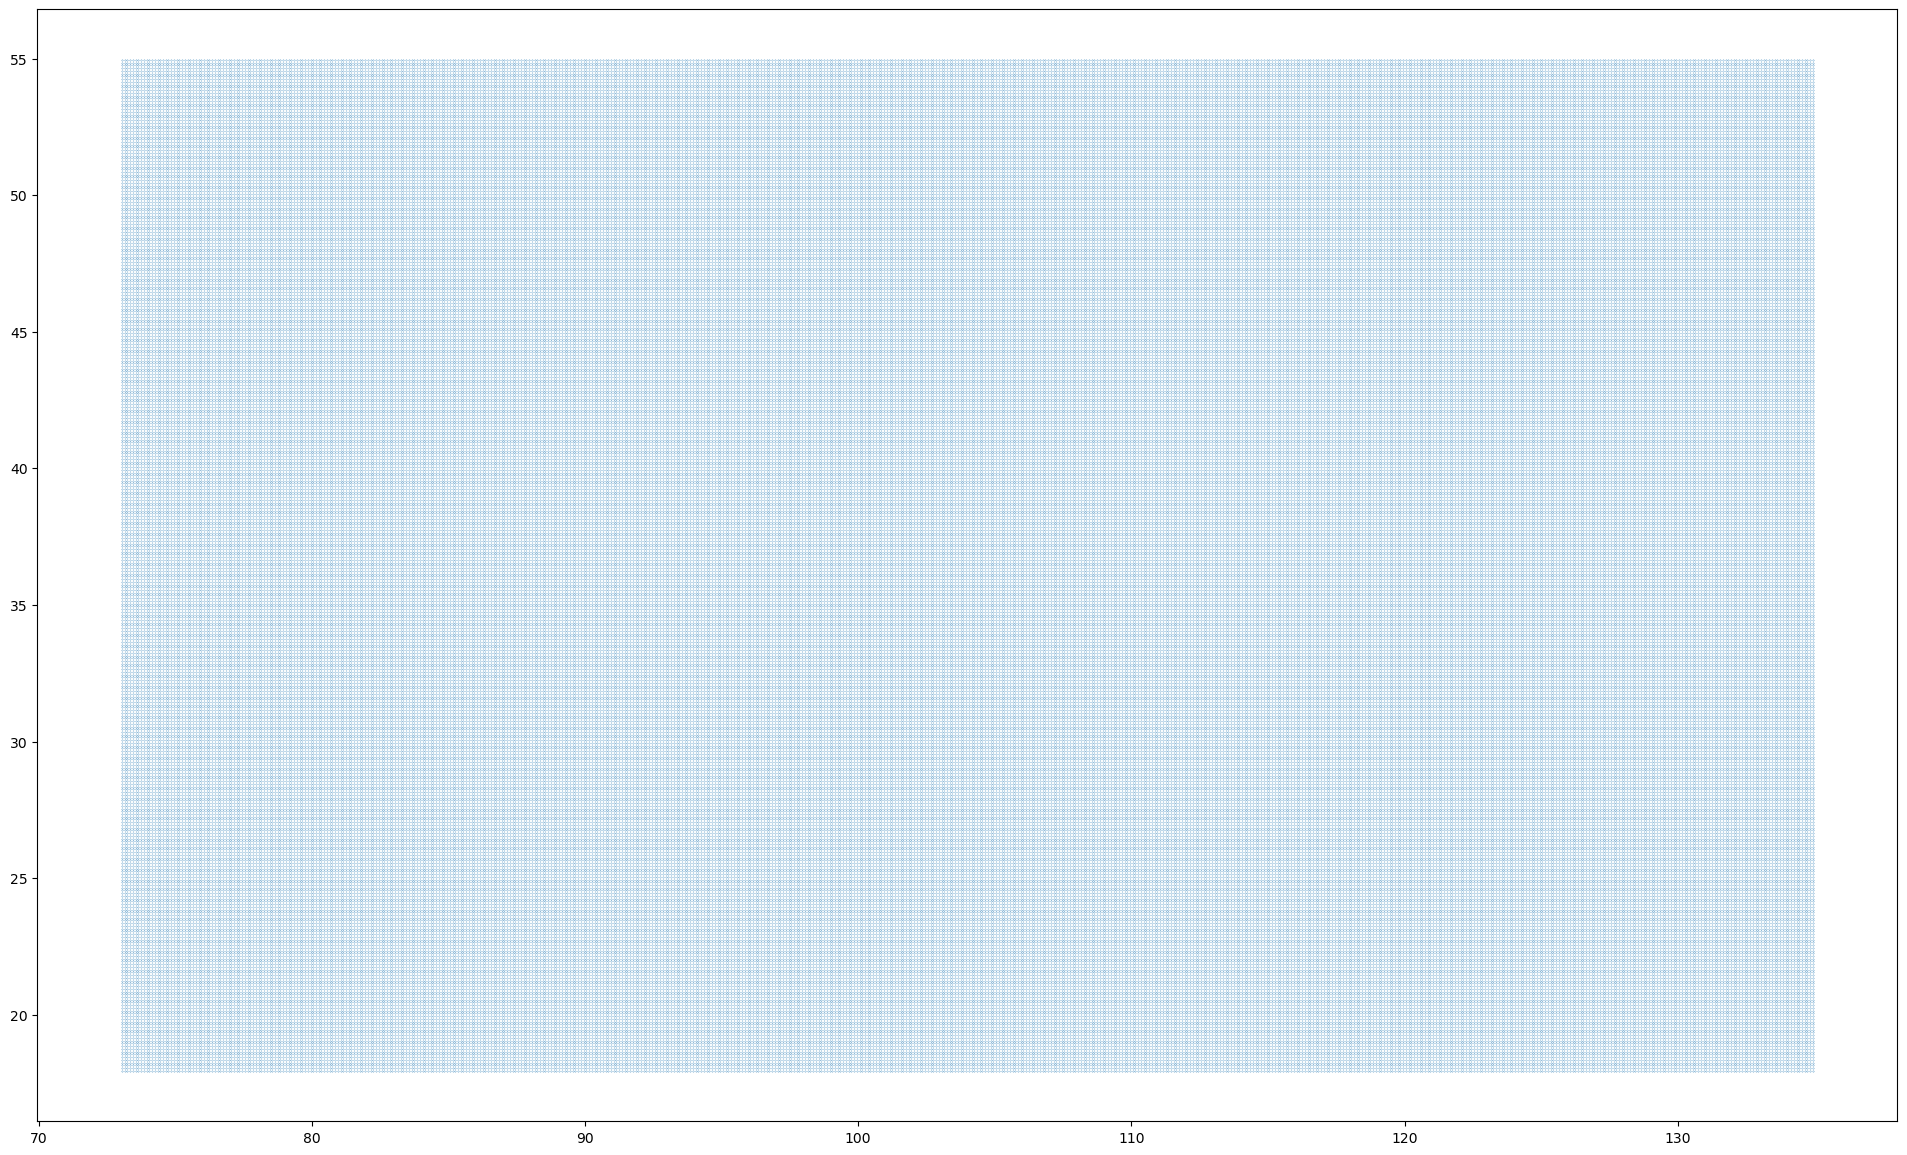

In [12]:
grid_gdf.plot(markersize=0.05,figsize=(24,30))

In [ ]:
import numpy as np
from haversine import haversine, haversine_vector

def idw_geodetic(target_coords, grid_coords, precip_values, k=5):

    # Compute geodesic distances using Haversine formula (vectorized for speed)
    distances = np.array([haversine_vector(target_coords, grid_coords, unit='km')])
    
    # Get the indices of the k-nearest neighbors for each target location
    nearest_indices = np.argsort(distances, axis=1)[:, :k]
    
    # Extract the corresponding distances and precipitation values
    nearest_distances = np.take_along_axis(distances, nearest_indices, axis=1)
    nearest_precip = np.take_along_axis(np.tile(precip_values, (len(target_coords), 1)), nearest_indices, axis=1)
    
    # Avoid zero distances to prevent division by zero errors
    nearest_distances = np.maximum(nearest_distances, 1e-6)

    # Calculate IDW weights
    weights = 1 / (nearest_distances ** 2)
    weights /= np.sum(weights, axis=1, keepdims=True)

    # Calculate weighted precipitation estimates
    estimated_precip = np.sum(weights * nearest_precip, axis=1)
    
    return estimated_precip

# Example data
grid_coords = [(30.1, 120.1), (30.2, 120.2), (30.3, 120.3), (30.4, 120.4), (30.5, 120.5)]
precip_values = np.array([10.5, 12.0, 9.8, 11.3, 15.2])
target_coords = [(30.25, 120.25), (30.35, 120.35)]

# Perform geodetic IDW interpolation
precip_estimates = idw_geodetic(target_coords, grid_coords, precip_values)
print(f"Estimated precipitation: {precip_estimates}")

In [1]:
from multiprocessing import Pool, cpu_count
print(cpu_count())

11


In [2]:
20/5

4.0

In [ ]:
import numpy as np
import pandas as pd
from geopy.distance import distance

def idw_geopy_for_dataframe(target_df, grid_df, k=5, power=2):
    """
    Perform Inverse Distance Weighting (IDW) for each row in the target DataFrame using geopy's great-circle distance.

    Parameters:
    - target_df : DataFrame : Target locations with columns ['latitude', 'longitude']
    - grid_df   : DataFrame : Grid locations with columns ['lat', 'lon', 'precipitation']
    - k         : int       : Number of nearest neighbors to consider (default=5)
    - power     : int       : Power parameter for IDW (default=2)

    Returns:
    - DataFrame : Target locations with estimated precipitation added as a new column.
    """

    def process_row(target_row):
        # Extract target coordinates
        target_lat = target_row['latitude']
        target_lon = target_row['longitude']
        target_coord = (target_lat, target_lon)

        # Calculate geodesic distances from target to all grid points
        grid_df['distance'] = grid_df.apply(lambda row: distance(target_coord, (row['lat'], row['lon'])).km, axis=1)

        # Select k nearest neighbors
        nearest_neighbors = grid_df.nsmallest(k, 'distance')

        # Extract distances and precipitation values
        nearest_distances = nearest_neighbors['distance'].values
        nearest_precip = nearest_neighbors['precipitation'].values

        # Avoid division by zero by setting a minimum distance threshold
        nearest_distances = np.maximum(nearest_distances, 1e-6)

        # Compute IDW weights
        weights = 1 / (nearest_distances ** power)
        weights /= np.sum(weights)  # Normalize the weights

        # Calculate weighted precipitation estimate
        estimated_precip = np.sum(weights * nearest_precip)
        return estimated_precip

    # Apply the function to each row of the target DataFrame
    target_df['estimated_precipitation'] = target_df.apply(process_row, axis=1)

    return target_df

# Example usage:

# Grid data with lat/lon and precipitation values
grid_data = {
    'lat': [30.1, 30.2, 30.3, 30.4, 30.5],
    'lon': [120.1, 120.2, 120.3, 120.4, 120.5],
    'precipitation': [10.5, 12.0, 9.8, 11.3, 15.2]
}
grid_df = pd.DataFrame(grid_data)

# Target locations
target_data = {
    'latitude': [30.25, 30.35],
    'longitude': [120.25, 120.35]
}
target_df = pd.DataFrame(target_data)

# Run IDW interpolation
result_df = idw_geopy_for_dataframe(target_df, grid_df)

# Display results
print(result_df)

In [18]:
import cpca

location_str = ["石家庄","唐山","秦皇岛","邯郸","邢台","保定","张家口","承德","沧州","廊坊","衡水"]
df = cpca.transform(location_str)



,省,市,区,地址,adcode
0,河北省,石家庄市,None,,130100
1,河北省,唐山市,None,,130200
2,河北省,秦皇岛市,None,,130300
3,河北省,邯郸市,None,,130400
4,河北省,邢台市,None,,130500
5,河北省,保定市,None,,130600
6,河北省,张家口市,None,,130700
7,河北省,承德市,None,,130800
8,河北省,沧州市,None,,130900
9,河北省,廊坊市,None,,131000


In [24]:
import pandas as pd
df = pd.read_csv("/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data/抗议数据/RFA_protest3.csv",encoding='utf-8')
df = df[['adcode','location','size_level','year','month','day','citycode','省','市','区']]
df.to_csv("/Users/anorawu/BFI Dropbox/Wanru Wu/Cloudseeding/data/抗议数据/RFA_protest3_cropped.csv",index=False)